# Imports

In [54]:
import os
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Creation des fichiers separes

In [60]:
data = pandas.read_csv("../data/dataNames.csv", header=0)

train_df, test_df = train_test_split(data, test_size=0.4, random_state=42)

print(train_df.size)
print(test_df.size)

train_df.to_csv("../data/train_data.csv", index=False)
test_df.to_csv("../data/test_data.csv", index=False)


10912
7296


# Parsing data

In [61]:
train_data = pandas.read_csv("../data/train_data.csv", header=0)
test_data = pandas.read_csv("../data/test_data.csv", header=0)
train_X = train_data.iloc[:, 2:] # La data sans id et diagnosis
train_Y = train_data['Diagnosis'].map({'B': 0, 'M': 1})
test_X = test_data.iloc[:, 2:] # La data sans id et diagnosis
test_Y = test_data['Diagnosis'].map({'B': 0, 'M': 1})

# numpy arrays :
train_X = train_X.to_numpy()
train_Y = train_Y.to_numpy().reshape(-1, 1)
test_X = test_X.to_numpy()
test_Y = test_Y.to_numpy().reshape(-1, 1)

# Normalisation des donnees
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_X)


print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(341, 30)
(341, 1)
(228, 30)
(228, 1)


# Creating perceptron

In [62]:
class MultilayerPerceptron :
	def __init__(self, X, Y):
		self.W = np.random.randn(X.shape[1], 1)
		self.b = np.random.randn(1)
		self.X = X
		self.Y = Y

	def model(self) :
		self.Z = self.X.dot(self.W) + self.b
		self.A = 1 / (1 + np.exp(-self.Z))

	def predict(self, X) :
		Z = X.dot(self.W) + self.b
		A = 1 / (1 + np.exp(-Z))
		return A

	def log_loss(self) :
		self.model()
		eps = 1e-15 
		A_clipped = np.clip(self.A, eps, 1 - eps) # pour éviter log(0) (empeche les valeures d'etre en dehors de l'interval 𝐴∈[10**−15,1−10**−15]
		result = -1 / self.X.shape[0] * np.sum(self.Y * np.log(A_clipped) + (1 - self.Y) * np.log(1 - A_clipped))
		return result

	def gradient_descent(self, learning_rate) :
		self.model()
		self.W -= learning_rate * (-1/self.X.shape[0] * np.dot(self.X.T, self.Y - self.A))
		self.b -= learning_rate * (-1/self.X.shape[0] * np.sum(self.Y - self.A))

# Revoir la vectorisation des differentes equations et noter dans la doc leur origine

# Testing perceptron

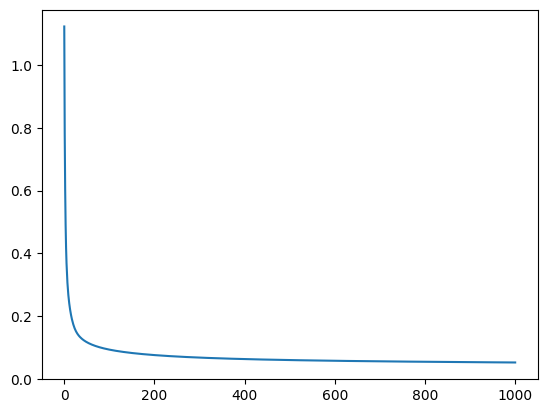

In [63]:
m = MultilayerPerceptron(X_scaled, train_Y)
Loss = []
m.model()
Loss.append(m.log_loss())
for _ in range(0, 1000) :
	m.gradient_descent(0.5)
	# print(m.log_loss())
	Loss.append(m.log_loss())
plt.plot(Loss)
plt.show()


# Fonction accuracy

In [66]:
def model_accuracy(p: MultilayerPerceptron, X, Y) :
	scaler = StandardScaler()
	X_scaled = scaler.fit_transform(X)
	A = p.predict(X_scaled)
	# print(A)
	# print(A.shape)
	accuracy: int = 0
	for i in range(0, Y.shape[0]) :
		if (A[i] > 0.5) == Y[i] :
			accuracy += 1
	print("Accuracy: ", accuracy / Y.shape[0] * 100)

from sklearn.metrics import confusion_matrix

def model_confusion(p: MultilayerPerceptron, X, Y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    preds = (p.predict(X_scaled) > 0.5).astype(int)
    print(confusion_matrix(Y, preds))

model_accuracy(m, X_test, Y_test)
model_confusion(m, X_test, Y_test)

Accuracy:  99.12280701754386
[[71  0]
 [ 1 42]]
